In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import spacy

In [8]:
finance = pd.read_csv(r"C:\Users\Joao\Desktop\Data Science\Projects\SUF\Startup Failure (Finance and Insurance).csv", sep = ";")
food_and_services = pd.read_csv(r"C:\Users\Joao\Desktop\Data Science\Projects\SUF\Startup Failure (Food and services).csv", sep = ";")
health_care = pd.read_csv(r"C:\Users\Joao\Desktop\Data Science\Projects\SUF\Startup Failure (Health Care).csv", sep = ";")
manufactures = pd.read_csv(r"C:\Users\Joao\Desktop\Data Science\Projects\SUF\Startup Failure (Manufactures).csv", sep = ";")
retail = pd.read_csv(r"C:\Users\Joao\Desktop\Data Science\Projects\SUF\Startup Failure (Retail Trade).csv", sep = ";")
it = pd.read_csv(r"C:\Users\Joao\Desktop\Data Science\Projects\SUF\Startup Failures (Information Sector).csv", sep = ";")

In [9]:
df = pd.concat([finance, food_and_services, health_care, manufactures, retail, it])

In [10]:
df

,Name,Sector,Years of Operation,What They Did,How Much They Raised,Why They Failed,Takeaway,Giants,No Budget,Competition,...,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype,High Operational Costs
0,Avant,Finance and Insurance,2012-2023,Online personal loans,$655M,Lost to LendingClub and high defaults,Lending needs risk balance,1,1,1,...,0,0.0,0,0,0,0,0.0,0.0,0.0,NaN
1,Bitpass,Finance and Insurance,2002-2008,Micropayments platform,$2M,Lost to PayPal and low adoption,Micropayments need mass use,1,0,1,...,0,0.0,0,0,0,0,0.0,0.0,0.0,NaN
2,Cake Financial,Finance and Insurance,2006-2011,Portfolio tracking tool,$3M,Lost to Mint and sold to TradeKing,Finance tools need scale,1,0,1,...,1,0.0,0,0,0,0,0.0,0.0,0.0,NaN
3,Circle,Finance and Insurance,2013-2023,Crypto payments and stablecoin,$500M,Lost to Coinbase and market shifts,Crypto needs stability,1,0,1,...,0,0.0,0,0,0,1,0.0,0.0,0.0,NaN
4,Clarity Money,Finance and Insurance,2016-2022,Personal finance app,$11M,Lost to Mint/Acorns and sold to Goldman,Finance apps need edge,1,0,1,...,1,0.0,0,0,0,0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,GoAnimate,Information,14 (2007-2021),DIY animation tool,$10M,Sold 2021; lost to Powtoon,Scale beats tools,1,0,1,...,1,0.0,0,0,0,0,0.0,0.0,0.0,NaN
152,Hitpost,Information,4 (2009-2013),Sports social app,$1M,Closed 2013; lost to X,Giants own fandom,1,0,0,...,0,0.0,0,1,0,0,0.0,0.0,0.0,NaN
153,Homer,Information,6 (2013-2019),Kids' reading app,$2.2M,Sold 2019; lost to Epic!,Kids' ed needs scale,1,0,1,...,1,0.0,0,0,0,0,0.0,0.0,0.0,NaN
154,Hot Potato,Information,2 (2009-2011),Social check-in app,$1.4M,Acquired 2011; shut down; lost to Foursquare,Early exits end,0,0,1,...,1,0.0,0,0,0,0,0.0,0.0,0.0,NaN


# Questions:
## - What industries have the most startup failures percentage? DONE
## - Average years of operation per industry / max / min. DONE
## - Correlation Analysis. DONE
## - Temporal trend analysis. DONE
## - What's the company most startups fail to compete with. DONE

## Cleaning

In [11]:
# Get the years of operation for every company

def add_duration(cell):
    
    match = re.search(r"(\d{4})\D+(\d{4})", cell)
    if match:
        start_year, end_year = map(int, match.groups())
        duration = end_year - start_year
        
        if re.match(r'^\d+\s*\(', cell):
            return cell 
        else:
            return f"{duration} ({cell})"
df["Years of Operation"] = df["Years of Operation"].apply(add_duration) 


In [12]:
#separate the year from the period
#add a failure year

def separate_year(cell):
    match = re.search(r"(^\d+)\s*\((\d{4})\D+(\d{4})\)", cell)
    if match:
        duration = int(match.group(1))  
        start_year = int(match.group(2))  
        end_year = int(match.group(3))  
        
        return pd.Series({"Years active": duration, "Years active range": f"{start_year}-{end_year}", "Year of failure": f"{end_year}"}) 

df[["Years Active", "Years active range", "Year of failure"]] = df["Years of Operation"].apply(separate_year)

In [13]:
df = df.drop(columns = "Years of Operation")

In [14]:
df.insert(2, "Years Active", df.pop("Years Active"))
df.insert(3, "Years active range", df.pop("Years active range"))
df.insert(4, "Year of failure", df.pop("Year of failure"))

In [15]:
df = df.drop_duplicates()

In [16]:
df.reset_index(drop = True, inplace = True)

In [17]:
df["High Operational Costs"] = df["High Operational Costs"].fillna(0) 

In [18]:
def adjust_money(cell):
    cell = cell.replace("$", "")
    match_millions = re.search(r"(\d+\.*\d*)M", cell)
    match_billions = re.search(r"(\d+\.*\d*)B", cell)
    if match_millions:
        return float(match_millions.group(1))
    elif match_billions:
        return float(match_billions.group(1)) * 1000
    else:
        return None

df["How Much They Raised"] = df["How Much They Raised"].apply(adjust_money)
df.rename(columns = {"How Much They Raised": "Money raised (in millions)"}, inplace = True)
        

In [19]:
df

,Name,Sector,Years Active,Years active range,Year of failure,What They Did,Money raised (in millions),Why They Failed,Takeaway,Giants,...,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype,High Operational Costs
0,Avant,Finance and Insurance,11,2012-2023,2023,Online personal loans,655.0,Lost to LendingClub and high defaults,Lending needs risk balance,1,...,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0
1,Bitpass,Finance and Insurance,6,2002-2008,2008,Micropayments platform,2.0,Lost to PayPal and low adoption,Micropayments need mass use,1,...,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0
2,Cake Financial,Finance and Insurance,5,2006-2011,2011,Portfolio tracking tool,3.0,Lost to Mint and sold to TradeKing,Finance tools need scale,1,...,1,0.0,0,0,0,0,0.0,0.0,0.0,0.0
3,Circle,Finance and Insurance,10,2013-2023,2023,Crypto payments and stablecoin,500.0,Lost to Coinbase and market shifts,Crypto needs stability,1,...,0,0.0,0,0,0,1,0.0,0.0,0.0,0.0
4,Clarity Money,Finance and Insurance,6,2016-2022,2022,Personal finance app,11.0,Lost to Mint/Acorns and sold to Goldman,Finance apps need edge,1,...,1,0.0,0,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,GoAnimate,Information,14,2007-2021,2021,DIY animation tool,10.0,Sold 2021; lost to Powtoon,Scale beats tools,1,...,1,0.0,0,0,0,0,0.0,0.0,0.0,0.0
405,Hitpost,Information,4,2009-2013,2013,Sports social app,1.0,Closed 2013; lost to X,Giants own fandom,1,...,0,0.0,0,1,0,0,0.0,0.0,0.0,0.0
406,Homer,Information,6,2013-2019,2019,Kids' reading app,2.2,Sold 2019; lost to Epic!,Kids' ed needs scale,1,...,1,0.0,0,0,0,0,0.0,0.0,0.0,0.0
407,Hot Potato,Information,2,2009-2011,2011,Social check-in app,1.4,Acquired 2011; shut down; lost to Foursquare,Early exits end,0,...,1,0.0,0,0,0,0,0.0,0.0,0.0,0.0


In [20]:
# check for unnecessary columns to remove 
hop_exists = df[df["High Operational Costs"] >= 1]

In [21]:
df.pop("High Operational Costs")

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
404    0.0
405    0.0
406    0.0
407    0.0
408    0.0
Name: High Operational Costs, Length: 409, dtype: float64

In [22]:
df

,Name,Sector,Years Active,Years active range,Year of failure,What They Did,Money raised (in millions),Why They Failed,Takeaway,Giants,...,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
0,Avant,Finance and Insurance,11,2012-2023,2023,Online personal loans,655.0,Lost to LendingClub and high defaults,Lending needs risk balance,1,...,0,0,0.0,0,0,0,0,0.0,0.0,0.0
1,Bitpass,Finance and Insurance,6,2002-2008,2008,Micropayments platform,2.0,Lost to PayPal and low adoption,Micropayments need mass use,1,...,1,0,0.0,0,0,0,0,0.0,0.0,0.0
2,Cake Financial,Finance and Insurance,5,2006-2011,2011,Portfolio tracking tool,3.0,Lost to Mint and sold to TradeKing,Finance tools need scale,1,...,0,1,0.0,0,0,0,0,0.0,0.0,0.0
3,Circle,Finance and Insurance,10,2013-2023,2023,Crypto payments and stablecoin,500.0,Lost to Coinbase and market shifts,Crypto needs stability,1,...,0,0,0.0,0,0,0,1,0.0,0.0,0.0
4,Clarity Money,Finance and Insurance,6,2016-2022,2022,Personal finance app,11.0,Lost to Mint/Acorns and sold to Goldman,Finance apps need edge,1,...,0,1,0.0,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,GoAnimate,Information,14,2007-2021,2021,DIY animation tool,10.0,Sold 2021; lost to Powtoon,Scale beats tools,1,...,0,1,0.0,0,0,0,0,0.0,0.0,0.0
405,Hitpost,Information,4,2009-2013,2013,Sports social app,1.0,Closed 2013; lost to X,Giants own fandom,1,...,0,0,0.0,0,1,0,0,0.0,0.0,0.0
406,Homer,Information,6,2013-2019,2019,Kids' reading app,2.2,Sold 2019; lost to Epic!,Kids' ed needs scale,1,...,0,1,0.0,0,0,0,0,0.0,0.0,0.0
407,Hot Potato,Information,2,2009-2011,2011,Social check-in app,1.4,Acquired 2011; shut down; lost to Foursquare,Early exits end,0,...,0,1,0.0,0,0,0,0,0.0,0.0,0.0


In [23]:
columns = ["Platform Dependency", "Toxicity/Trust Issues", "Regulatory Pressure", "Overhype"]
df[columns] = df[columns].fillna(0).astype(int)

In [24]:
df

,Name,Sector,Years Active,Years active range,Year of failure,What They Did,Money raised (in millions),Why They Failed,Takeaway,Giants,...,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
0,Avant,Finance and Insurance,11,2012-2023,2023,Online personal loans,655.0,Lost to LendingClub and high defaults,Lending needs risk balance,1,...,0,0,0,0,0,0,0,0,0,0
1,Bitpass,Finance and Insurance,6,2002-2008,2008,Micropayments platform,2.0,Lost to PayPal and low adoption,Micropayments need mass use,1,...,1,0,0,0,0,0,0,0,0,0
2,Cake Financial,Finance and Insurance,5,2006-2011,2011,Portfolio tracking tool,3.0,Lost to Mint and sold to TradeKing,Finance tools need scale,1,...,0,1,0,0,0,0,0,0,0,0
3,Circle,Finance and Insurance,10,2013-2023,2023,Crypto payments and stablecoin,500.0,Lost to Coinbase and market shifts,Crypto needs stability,1,...,0,0,0,0,0,0,1,0,0,0
4,Clarity Money,Finance and Insurance,6,2016-2022,2022,Personal finance app,11.0,Lost to Mint/Acorns and sold to Goldman,Finance apps need edge,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,GoAnimate,Information,14,2007-2021,2021,DIY animation tool,10.0,Sold 2021; lost to Powtoon,Scale beats tools,1,...,0,1,0,0,0,0,0,0,0,0
405,Hitpost,Information,4,2009-2013,2013,Sports social app,1.0,Closed 2013; lost to X,Giants own fandom,1,...,0,0,0,0,1,0,0,0,0,0
406,Homer,Information,6,2013-2019,2019,Kids' reading app,2.2,Sold 2019; lost to Epic!,Kids' ed needs scale,1,...,0,1,0,0,0,0,0,0,0,0
407,Hot Potato,Information,2,2009-2011,2011,Social check-in app,1.4,Acquired 2011; shut down; lost to Foursquare,Early exits end,0,...,0,1,0,0,0,0,0,0,0,0


In [25]:
# What industries have the most startup failures?
df["Sector"].value_counts()

Sector
Information                        156
Retail Trade                        90
Health Care                         60
Finance and Insurance               47
Manufacturing                       30
Accommodation and Food Services     26
Name: count, dtype: int64

In [39]:
# Average years of operation for companies by sector
df.groupby("Sector")["Years Active"].median().round(2).sort_values(ascending = False)

Sector
Information                        7.0
Manufacturing                      7.0
Finance and Insurance              6.0
Health Care                        6.0
Retail Trade                       6.0
Accommodation and Food Services    5.5
Name: Years Active, dtype: float64

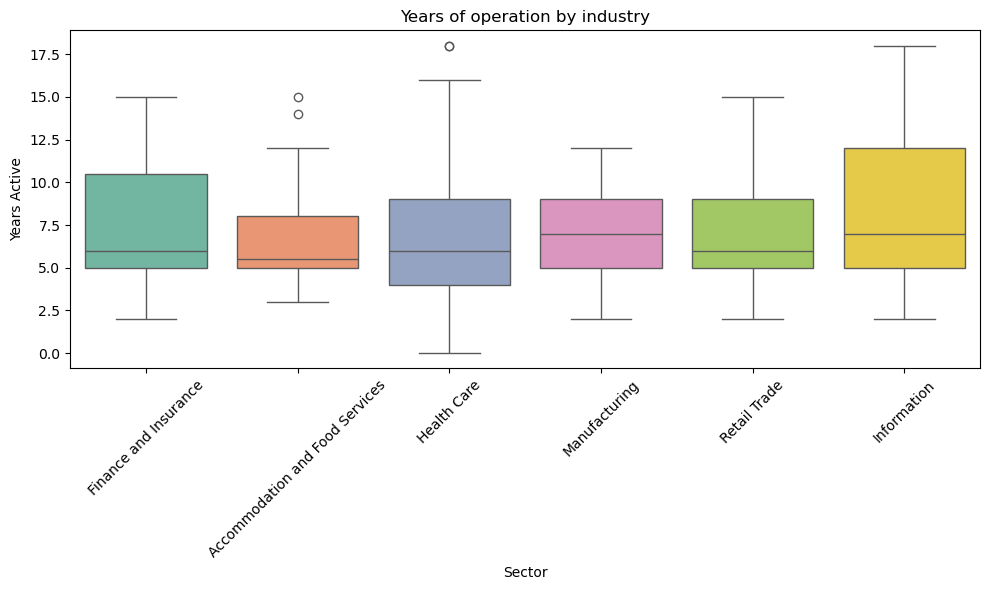

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = "Sector", y = "Years Active", hue = "Sector", data = df, palette = "Set2", legend = False)
plt.xticks(rotation = 45)
plt.title("Years of operation by industry")
plt.tight_layout()
plt.show()

In [29]:
# Max years of operation for companies by sector
df.groupby("Sector")["Years Active"].max().sort_values(ascending = False)

Sector
Health Care                        18
Information                        18
Accommodation and Food Services    15
Finance and Insurance              15
Retail Trade                       15
Manufacturing                      12
Name: Years Active, dtype: int64

In [30]:
# Min years of operation for companies by sector
df.groupby("Sector")["Years Active"].min().sort_values()

Sector
Health Care                        0
Finance and Insurance              2
Information                        2
Manufacturing                      2
Retail Trade                       2
Accommodation and Food Services    3
Name: Years Active, dtype: int64

In [47]:
df

,Name,Sector,Years Active,Years active range,Year of failure,What They Did,Money raised (in millions),Why They Failed,Takeaway,Giants,...,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
0,Avant,Finance and Insurance,11,2012-2023,2023,Online personal loans,655.0,Lost to LendingClub and high defaults,Lending needs risk balance,1,...,0,0,0,0,0,0,0,0,0,0
1,Bitpass,Finance and Insurance,6,2002-2008,2008,Micropayments platform,2.0,Lost to PayPal and low adoption,Micropayments need mass use,1,...,1,0,0,0,0,0,0,0,0,0
2,Cake Financial,Finance and Insurance,5,2006-2011,2011,Portfolio tracking tool,3.0,Lost to Mint and sold to TradeKing,Finance tools need scale,1,...,0,1,0,0,0,0,0,0,0,0
3,Circle,Finance and Insurance,10,2013-2023,2023,Crypto payments and stablecoin,500.0,Lost to Coinbase and market shifts,Crypto needs stability,1,...,0,0,0,0,0,0,1,0,0,0
4,Clarity Money,Finance and Insurance,6,2016-2022,2022,Personal finance app,11.0,Lost to Mint/Acorns and sold to Goldman,Finance apps need edge,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,GoAnimate,Information,14,2007-2021,2021,DIY animation tool,10.0,Sold 2021; lost to Powtoon,Scale beats tools,1,...,0,1,0,0,0,0,0,0,0,0
405,Hitpost,Information,4,2009-2013,2013,Sports social app,1.0,Closed 2013; lost to X,Giants own fandom,1,...,0,0,0,0,1,0,0,0,0,0
406,Homer,Information,6,2013-2019,2019,Kids' reading app,2.2,Sold 2019; lost to Epic!,Kids' ed needs scale,1,...,0,1,0,0,0,0,0,0,0,0
407,Hot Potato,Information,2,2009-2011,2011,Social check-in app,1.4,Acquired 2011; shut down; lost to Foursquare,Early exits end,0,...,0,1,0,0,0,0,0,0,0,0


In [48]:
#What year did most industries fail? And the latter but divided by sector
df["Year of failure"].value_counts().sort_values(ascending = False)

Year of failure
2020    61
2018    53
2017    47
2023    45
2019    44
2021    35
2022    32
2016    28
2015    19
2013    11
2014    10
2012     6
2011     4
2008     3
2007     2
2024     2
2002     1
2000     1
1999     1
2005     1
2003     1
1984     1
2010     1
Name: count, dtype: int64

In [49]:
#Correlation analysis
df.columns

Index(['Name', 'Sector', 'Years Active', 'Years active range',
       'Year of failure', 'What They Did', 'Money raised (in millions)',
       'Why They Failed', 'Takeaway', 'Giants', 'No Budget', 'Competition',
       'Poor Market Fit', 'Acquisition Stagnation', 'Platform Dependency',
       'Monetization Failure', 'Niche Limits', 'Execution Flaws',
       'Trend Shifts', 'Toxicity/Trust Issues', 'Regulatory Pressure',
       'Overhype'],
      dtype='object')

In [50]:
df.corr(numeric_only = True)

,Years Active,Money raised (in millions),Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
Years Active,1.000000,0.133532,0.101600,-0.193097,0.116273,-0.285343,0.133633,0.050259,-0.016852,-0.199480,0.072698,-0.001567,0.099859,0.052611,-0.110483
Money raised (in millions),0.133532,1.000000,0.039004,0.071408,0.007229,-0.096742,-0.065971,0.064412,-0.070252,-0.163600,0.113756,0.147852,0.064067,-0.021047,0.198866
Giants,0.101600,0.039004,1.000000,-0.057801,0.236024,-0.241821,0.060960,0.075565,-0.211584,-0.044827,-0.018964,-0.002461,-0.007883,-0.016926,-0.001607
No Budget,-0.193097,0.071408,-0.057801,1.000000,-0.190293,0.074555,-0.212510,0.032895,0.113213,0.033566,0.100835,0.075016,-0.090408,-0.056266,0.180816
Competition,0.116273,0.007229,0.236024,-0.190293,1.000000,-0.211660,0.016274,-0.082402,-0.148888,-0.131031,-0.056275,-0.074989,-0.008534,0.030842,-0.080821
Poor Market Fit,-0.285343,-0.096742,-0.241821,0.074555,-0.211660,1.000000,-0.206833,-0.065575,0.065748,0.185695,-0.154027,-0.132938,-0.094673,-0.059813,0.029561
Acquisition Stagnation,0.133633,-0.065971,0.060960,-0.212510,0.016274,-0.206833,1.000000,0.065382,-0.096448,-0.193894,-0.171959,-0.033955,-0.105063,-0.003715,-0.066780
Platform Dependency,0.050259,0.064412,0.075565,0.032895,-0.082402,-0.065575,0.065382,1.000000,-0.053101,-0.059446,-0.001433,0.015024,0.049617,-0.024843,-0.029921
Monetization Failure,-0.016852,-0.070252,-0.211584,0.113213,-0.148888,0.065748,-0.096448,-0.053101,1.000000,-0.011615,-0.067082,-0.025793,-0.098228,-0.075759,0.137907
Niche Limits,-0.199480,-0.163600,-0.044827,0.033566,-0.131031,0.185695,-0.193894,-0.059446,-0.011615,1.000000,-0.168334,-0.135339,-0.081625,-0.048902,-0.102147


<Axes: >

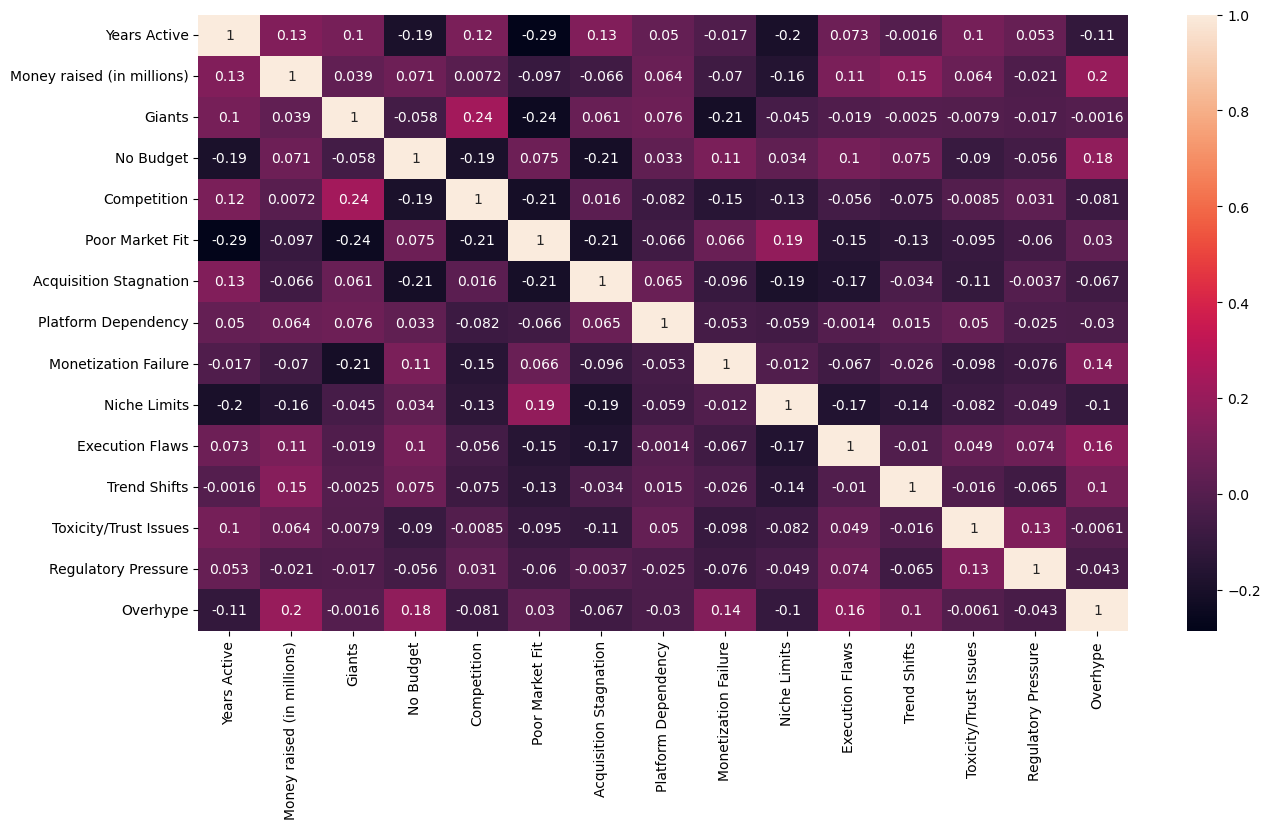

In [51]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only = True), annot = True)

In [52]:
# Time trend analysis
df["Year of failure"] = df["Year of failure"].astype(int)

In [53]:
df.groupby("Sector")["Year of failure"].median().round(0)

Sector
Accommodation and Food Services    2019.0
Finance and Insurance              2020.0
Health Care                        2019.0
Information                        2019.0
Manufacturing                      2018.0
Retail Trade                       2019.0
Name: Year of failure, dtype: float64

In [ ]:
df.head()

In [ ]:
pattern = ((r"(Lost to ([a-zA-Z0-9_]+))"))
lost_to = []
def find_company(cell):
    match = re.search(pattern, cell, re.IGNORECASE)
    if match:
        return match.group(2)

df["Lost to"] = df["Why They Failed"].apply(find_company)

In [ ]:
#Which one is the company that most startups fail to compete with
df["Lost to"].value_counts()

In [ ]:
df.columns

In [ ]:
# df.to_excel(r"C:\Users\Joao\Desktop\Data Analytics\Projects\SUF\Startup Failures.xlsx", index = False)